In [42]:
import pandas as pd
import numpy as np
import wfdb
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ruta de los archivos
path = "C:/Users/user/Downloads/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/"

# Cargar metadata
ecgs_df = pd.read_csv(path + "ptbxl_database.csv", index_col="ecg_id")
# Cargar códigos SCP
diagnosis_df = pd.read_csv(path + "scp_statements.csv", index_col=0)
diagnosis_df = diagnosis_df[diagnosis_df.diagnostic == 1]  # Solo diagnósticos

In [45]:
# Mostrar primeras filas
display(ecgs_df.head())

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [46]:
display(diagnosis_df.head())

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [ ]:
# --- 1. Convertir la columna 'scp_codes' a diccionarios ---
ecgs_df.scp_codes = ecgs_df.scp_codes.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ecgs_df.scp_codes = ecgs_df.scp_codes.apply(lambda x: x if isinstance(x, dict) else {})

In [ ]:
# --- 2. Agregar superclase diagnóstica ---
def aggregate_diagnostic(y_dic):
    return list(set([diagnosis_df.loc[key].diagnostic_class for key in y_dic.keys() if key in diagnosis_df.index]))

ecgs_df["diagnostic_superclass"] = ecgs_df.scp_codes.apply(aggregate_diagnostic)

In [ ]:
# --- 3. Resumen General ---
print("\nInformación del dataset:")
print(ecgs_df.info())



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 21799 entries, 1 to 21837
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    21799 non-null  float64
 1   age                           21799 non-null  float64
 2   sex                           21799 non-null  int64  
 3   height                        6974 non-null   float64
 4   weight                        9421 non-null   float64
 5   nurse                         20326 non-null  float64
 6   site                          21782 non-null  float64
 7   device                        21799 non-null  object 
 8   recording_date                21799 non-null  object 
 9   report                        21799 non-null  object 
 10  scp_codes                     21799 non-null  object 
 11  heart_axis                    13331 non-null  object 
 12  infarction_stadium1           5612 non-

In [50]:
print("\nValores nulos por columna:")
print(ecgs_df.isnull().sum())


Valores nulos por columna:
patient_id                          0
age                                 0
sex                                 0
height                          14825
weight                          12378
nurse                            1473
site                               17
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8468
infarction_stadium1             16187
infarction_stadium2             21696
validated_by                     9378
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20201
static_noise                    18539
burst_noise                     21186
electrodes_problems             21769
extra_beats                     19850
pacemaker                       21508
strat_fold                          0
filename_lr           

In [54]:
# Estadísticas descriptivas
ecgs_stats = ecgs_df.describe()
print("Estadísticas descriptivas de ECG:", ecgs_stats)

Estadísticas descriptivas de ECG:          patient_id           age           sex       height       weight  \
count  21799.000000  21799.000000  21799.000000  6974.000000  9421.000000   
mean   11250.156521     62.769301      0.479150   166.702323    70.995223   
std     6235.026404     32.308813      0.499577    10.867321    15.878803   
min      302.000000      2.000000      0.000000     6.000000     5.000000   
25%     5974.500000     50.000000      0.000000   160.000000    60.000000   
50%    11419.000000     62.000000      0.000000   166.000000    70.000000   
75%    16607.500000     72.000000      1.000000   174.000000    80.000000   
max    21797.000000    300.000000      1.000000   209.000000   250.000000   

              nurse          site  validated_by    strat_fold  
count  20326.000000  21782.000000  12421.000000  21799.000000  
mean       2.291745      1.544945      0.746075      5.503005  
std        3.254033      4.172883      1.178003      2.874948  
min        0.000

In [51]:
print("\nDistribución de clases diagnósticas:")
print(ecgs_df.explode("diagnostic_superclass")["diagnostic_superclass"].value_counts())


Distribución de clases diagnósticas:
diagnostic_superclass
NORM    9514
MI      5469
STTC    5235
CD      4898
HYP     2649
Name: count, dtype: int64


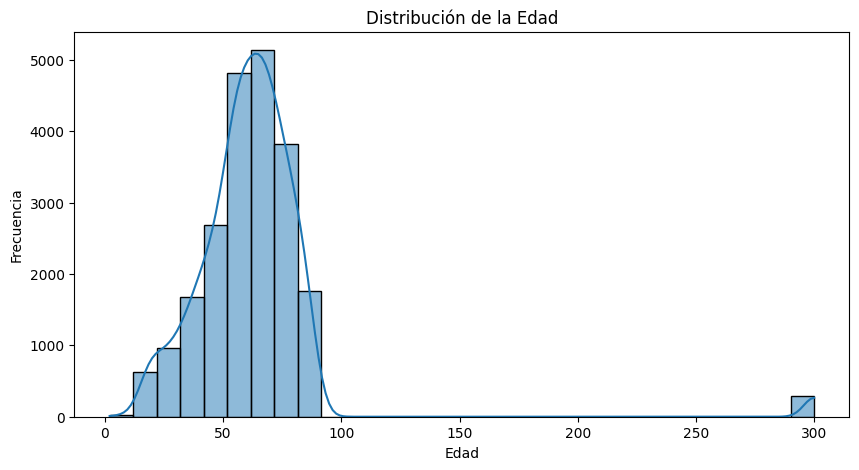

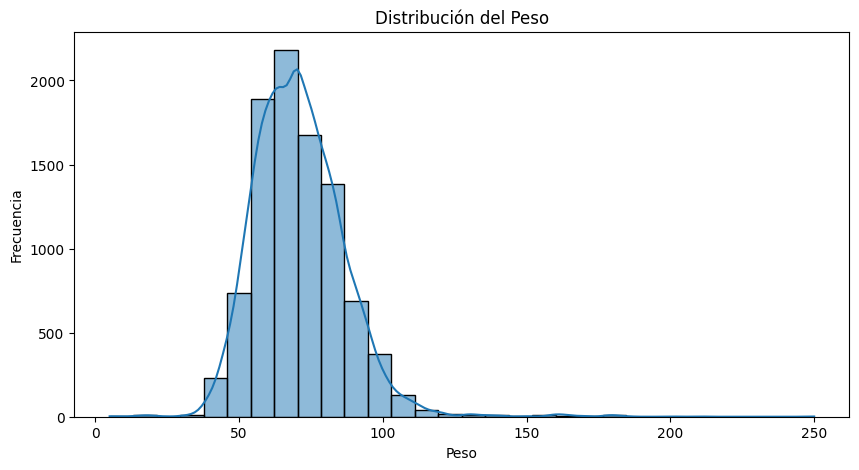

In [61]:
# --- 4. Visualización de distribuciones (Edad, Peso)---
plt.figure(figsize=(10,5))
sns.histplot(ecgs_df['age'].dropna(), bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(ecgs_df['weight'].dropna(), bins=30, kde=True)
plt.title('Distribución del Peso')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

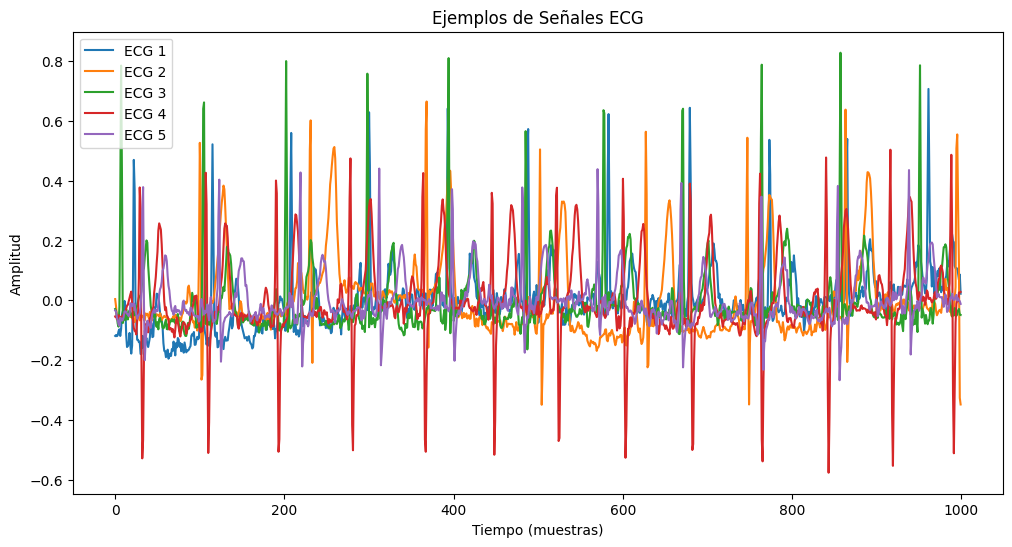

In [ ]:
# --- 5. Cargar y visualizar algunas señales ECG ---
X = np.array([wfdb.rdsamp(path + f)[0] for f in ecgs_df.filename_lr[:5]])  # Cargar solo 5 señales

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(X[i][:, 0], label=f"ECG {i+1}")
plt.title("Ejemplos de Señales ECG")
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

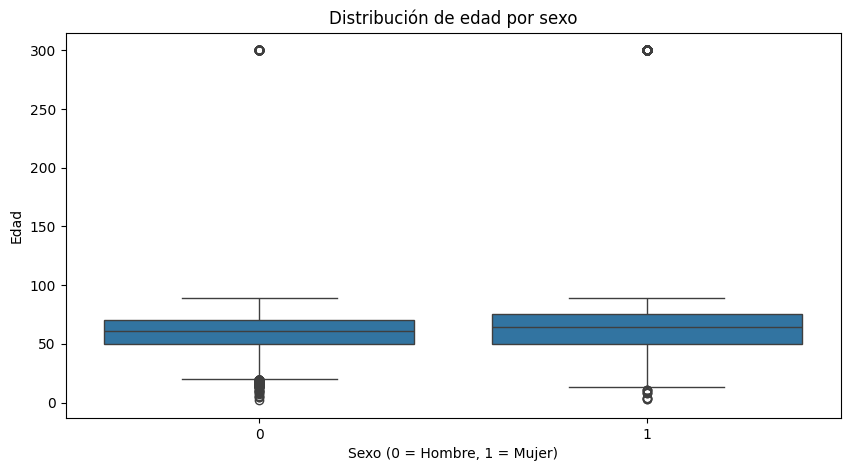

In [ ]:
# --- 6. Relación entre edad y algunos diagnósticos ---
plt.figure(figsize=(10,5))
sns.boxplot(x='sex', y='age', data=ecgs_df)
plt.title('Distribución de edad por sexo')
plt.xlabel('Sexo (0 = Hombre, 1 = Mujer)')
plt.ylabel('Edad')
plt.show()

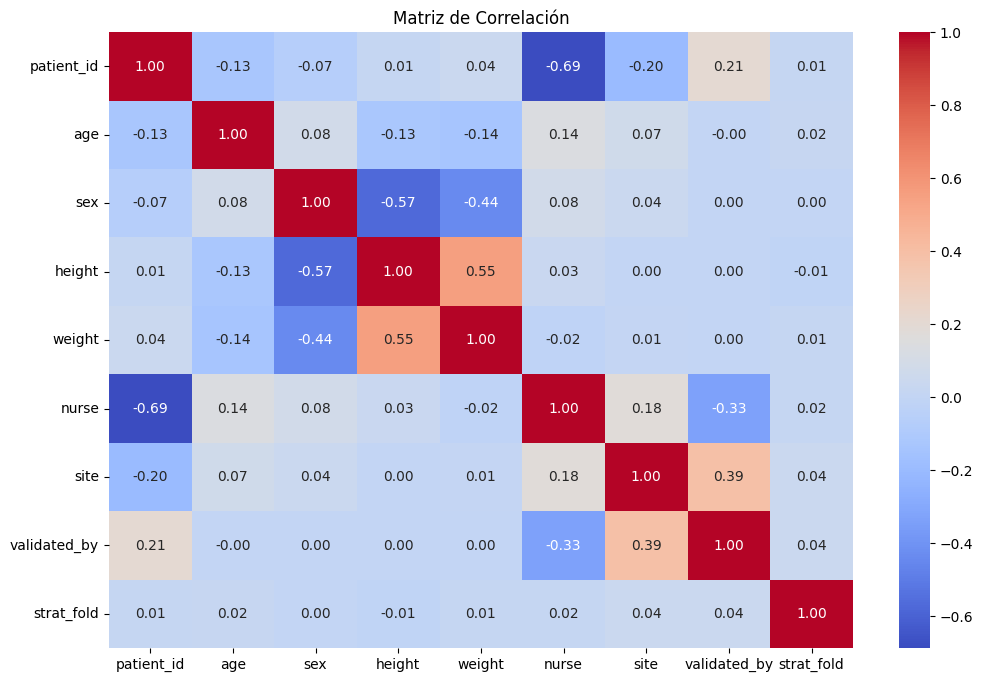

In [ ]:
# --- 7. Matriz de correlación ---
plt.figure(figsize=(12, 8))
sns.heatmap(ecgs_df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


diagnostic_superclass
NORM    9514
MI      5469
STTC    5235
CD      4898
HYP     2649
Name: count, dtype: int64


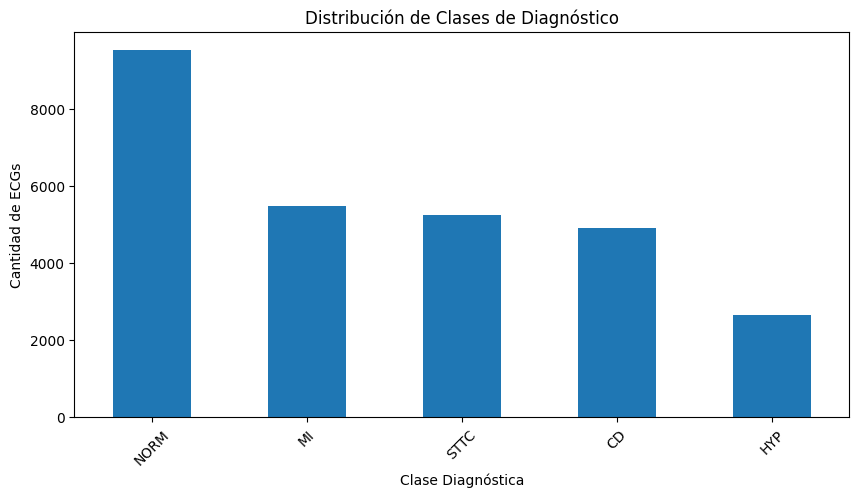

In [53]:
# --- 3. Distribución de Clases de Diagnóstico ---

def aggregate_diagnostic(y_dic):
    return list(set([diagnosis_df.loc[key].diagnostic_class for key in y_dic.keys() if key in diagnosis_df.index]))

ecgs_df["diagnostic_superclass"] = ecgs_df["scp_codes"].apply(aggregate_diagnostic)

# Contar diagnósticos generales
diagnostic_counts = ecgs_df.explode("diagnostic_superclass")["diagnostic_superclass"].value_counts()
print(diagnostic_counts)

# Graficar distribución de diagnósticos
plt.figure(figsize=(10,5))
diagnostic_counts.plot(kind="bar")
plt.title("Distribución de Clases de Diagnóstico")
plt.xlabel("Clase Diagnóstica")
plt.ylabel("Cantidad de ECGs")
plt.xticks(rotation=45)
plt.show()